In [1]:
# Youtube: https://www.youtube.com/watch?v=uI02dn7PsHI&list=PLOFEBzvs-VvqJwybFxkTiDzhf5E11p8BI&index=8

In [2]:
# Initialization
import numpy as np

# Importing Qiskit
from qiskit import QuantumCircuit, IBMQ, BasicAer, execute
from qiskit.providers.ibmq import least_busy
from qiskit.tools.jupyter import *
provider = IBMQ.load_account()

# Import basic plot tools
from qiskit.visualization import plot_histogram

In [3]:
def dj_oracle(case, n):
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input, 
    # plus one output qubit
    oracle_qc = QuantumCircuit(n+1)
    
    # First, let's deal with the case in which oracle is balanced
    if case == "balanced":
        # We apply controlled-NOT gates for each qubit, using the
        # output qubit as the target:
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
            
    # Case in which oracle is constant
    if case == "constant":
        # First decide what the fixed output of the oracle will be
        # (either always 0 or always 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
            
    display(oracle_qc.draw('mpl'))
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # To show when we display the circuit
    return oracle_gate

In [4]:
def dj_algorithm(n, case = 'random'):
    dj_circuit = QuantumCircuit(n+1, n)
    
    # Set up the input register:
    for qubit in range(n):
        dj_circuit.h(qubit)
        
    # And set up the output qubit:
    dj_circuit.x(n)
    dj_circuit.h(n)
    
    # Let's append the oracle gate to our circuit:
    if case == 'random':
        random = np.random.randint(2)
        if random == 0:
            case = 'constant'
        else:
            case = 'balanced'
            
    oracle = dj_oracle(case, n)
    dj_circuit.append(oracle, range(n+1))
    
    # Finally, perform the H-gates again and measure:
    for i in range(n):
        dj_circuit.h(i)
        dj_circuit.measure(i, i)
    return dj_circuit

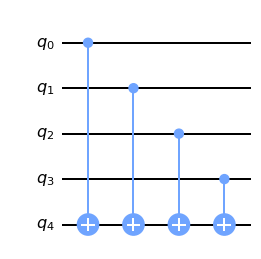

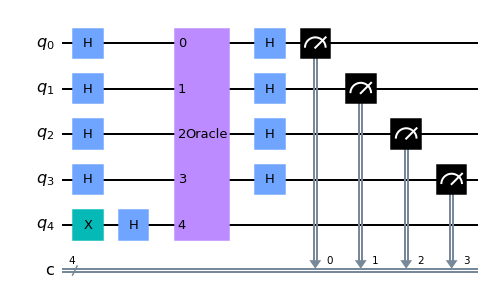

In [5]:
n = 4
dj_circuit = dj_algorithm(n)
# dj_circuit = dj_algorithm(n, 'constant')
# dj_circuit = dj_algorithm(n, 'balanced')
dj_circuit.draw('mpl')

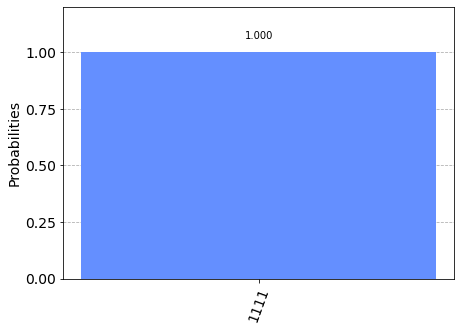

In [6]:
# use local simulator
backend = BasicAer.get_backend('qasm_simulator')
results = execute(dj_circuit, backend = backend, shots = 1024).result()
answer = results.get_counts()

plot_histogram(answer)
# If 1111 = 'balanced'; 0000 = 'constant'

In [7]:
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
                                      not x.configuration().simulator and x.status().operational == True))
#backend = provider.get_backend('ibmq_belem')
print("least busy backend: ", backend)
%qiskit_job_watcher

least busy backend:  ibmq_belem


Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

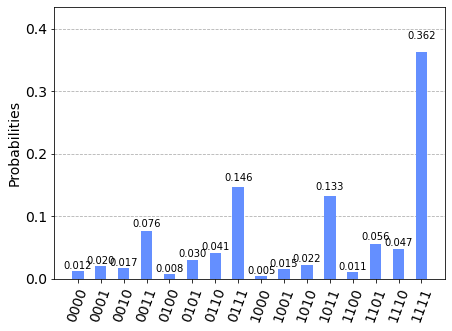

In [8]:
job = execute(dj_circuit, backend=backend, shots=1024, optimization_level=3)

results = job.result()
answer = results.get_counts()
plot_histogram(answer)